<a href="https://colab.research.google.com/github/SkrowRepap/TINA2.0/blob/google%2Fcollab/Tina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410 kB 12.9 MB/s 


In [ ]:
# Get the data from the json file
# Get the patterns (for our list of questions) and tags (for our list of intents)
# Data augmentation

import json
import pandas as pd

# Import NLPAUG for data augmentation
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
from nlpaug.util import Action

data  = pd.read_csv("/content/drive/MyDrive/Tina Version 2/Datasets/Filtered Data Set/csv/as od August 25,2022.csv")
col = ['Subject']
col.1
patterns = [col]
tags = []
ignore_chars = [".", ",", "?", "!", "'", "-"]

for intent in data[col]:
  for pattern in intent["patterns"]:
    patterns.append(pattern)
    tags.append(intent["tag"])
    # Remove punctuations
    for char in pattern:
      if char in ignore_chars:
        pattern_1 = pattern.replace(char, "")
        patterns.append(pattern_1)
        tags.append(intent["tag"])
    # OCR augmenter
    aug = nac.OcrAug()
    pattern_2 = aug.augment(pattern)[0]
    patterns.append(pattern_2)
    tags.append(intent["tag"])
    aug = nac.OcrAug()
    pattern_3 = aug.augment(pattern)[0]
    patterns.append(pattern_3)
    tags.append(intent["tag"])
    # Keyboard augmenter
    aug = nac.KeyboardAug()
    pattern_4 = aug.augment(pattern)[0]
    patterns.append(pattern_4)
    tags.append(intent["tag"])
    aug = nac.KeyboardAug()
    pattern_5 = aug.augment(pattern)[0]
    patterns.append(pattern_5)
    tags.append(intent["tag"])
    # Spelling augmenter
    aug = naw.SpellingAug()
    pattern_6 = aug.augment(pattern)[0]
    patterns.append(pattern_6)
    tags.append(intent["tag"])
    aug = naw.SpellingAug()
    pattern_7 = aug.augment(pattern)[0]
    patterns.append(pattern_7)
    tags.append(intent["tag"])
    # Word swap augmenter
    aug = naw.RandomWordAug(action="swap")
    pattern_8 = aug.augment(pattern)[0]
    patterns.append(pattern_8)
    tags.append(intent["tag"])
    aug = naw.RandomWordAug(action="swap")
    pattern_9 = aug.augment(pattern)[0]
    patterns.append(pattern_9)
    tags.append(intent["tag"])
    # Word split augmenter
    aug = naw.SplitAug()
    pattern_10 = aug.augment(pattern)[0]
    patterns.append(pattern_10)
    tags.append(intent["tag"])
    aug = naw.SplitAug()
    pattern_11 = aug.augment(pattern)[0]
    patterns.append(pattern_11)
    tags.append(intent["tag"])
    # Synonym augmenter
    aug = naw.SynonymAug(aug_src='wordnet')
    pattern_12 = aug.augment(pattern)[0]
    patterns.append(pattern_12)
    tags.append(intent["tag"])
    aug = naw.SynonymAug(aug_src='wordnet')
    pattern_13 = aug.augment(pattern)[0]
    patterns.append(pattern_13)
    tags.append(intent["tag"])
    aug = naw.SynonymAug(aug_src='wordnet')
    pattern_14 = aug.augment(pattern)[0]
    patterns.append(pattern_14)
    tags.append(intent["tag"])
    aug = naw.SynonymAug(aug_src='wordnet')
    pattern_15 = aug.augment(pattern)[0]
    patterns.append(pattern_15)
    tags.append(intent["tag"])

TypeError: ignored

In [ ]:
# Create and display dataframe
# Remove duplicate rows

data = {"questions":patterns, "intents":tags}
df = pd.DataFrame(data)
df = df.reset_index(drop=True)
df = df.dropna()
df = df.drop_duplicates()
df.head(500)

,questions,intents
0,"Hi,Tina",greeting
1,HiTina,greeting
2,"Hi, Tina",greeting
4,"Hi, HiHa",greeting
5,"Hi, fJna",greeting
...,...,...
527,how to enrolll,enrollment
528,to how enroll,enrollment
529,To how enroll,enrollment
530,how to en roll,enrollment


In [ ]:
# Display the counts

df.describe()

,questions,intents
count,424,424
unique,424,9
top,"Hi,Tina",help
freq,1,96


In [ ]:
import numpy as np

unique_intents = np.unique(df.intents)
unique_intents

array(['about', 'complaint', 'enrollment', 'goodbye', 'greeting', 'help',
       'name', 'request ticket', 'thanks'], dtype=object)

In [ ]:
# Set the number of samples

N_SAMPLES = len(df)
N_SAMPLES

424

In [ ]:
# Turn the labels into numbers

from sklearn import preprocessing

le = preprocessing.LabelEncoder() 
 
labels = le.fit_transform(df.intents)
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
# Set the number of labels

N_LABELS = len(np.unique(labels))
N_LABELS

9

In [ ]:
# Import BertTokenizer
# Set the tokenizer
!pip install transformers
from transformers import BertTokenizer

BERT_MODEL_NAME = "bert-base-uncased"
TOKENIZER = BertTokenizer.from_pretrained(BERT_MODEL_NAME)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 4.2 MB/s 
     |████████████████████████████████| 182 kB 48.6 MB/s 
     |████████████████████████████████| 7.6 MB 31.3 MB/s 


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Get all text sequence length in the questions column
# Set the max sequence length

token_lens = []

for text in df.questions:
  tokens = TOKENIZER.encode(text, max_length=512)
  token_lens.append(len(tokens))

MAX_LEN = max(token_lens)
MAX_LEN

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


18

In [ ]:
# Split the data into training, validation, and test sets

from sklearn.model_selection import train_test_split

texts = np.array(df.questions)

x_train, x_val, y_train, y_val = train_test_split(texts, labels, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.5, random_state=42)
len(x_train), len(y_train), len(x_val), len(y_val), len(x_test), len(y_test)

(339, 339, 42, 42, 43, 43)

In [ ]:
# Create a custom dataset module

import torch

class DatasetEncoder:
  def __init__(self, texts, labels):
    self.texts = texts
    self.labels = labels
    self.tokenizer = TOKENIZER
    self.max_len = MAX_LEN

  def __len__(self):
    return len(self.texts)

  def __getitem__(self, idx):
    text = str(self.texts[idx])
    label = self.labels[idx]

    tokens = self.tokenizer.encode_plus(
        text,
        max_length=self.max_len,
        truncation=True,
        padding="max_length",
        add_special_tokens=True,
    )

    return {
        "input_ids": torch.tensor(tokens["input_ids"], dtype=torch.long),
        "attention_mask": torch.tensor(tokens["attention_mask"], dtype=torch.long),
        "label": torch.tensor(label, dtype=torch.long)
    }


In [ ]:
# Create encoded datasets

train_data = DatasetEncoder(x_train, y_train)
valid_data = DatasetEncoder(x_val, y_val)
test_data = DatasetEncoder(x_test, y_test)
train_data[0]

{'input_ids': tensor([ 101, 1059, 2232, 2480, 2629, 2024, 2017, 1029,  102,    0,    0,    0,
            0,    0,    0,    0,    0,    0]),
 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'label': tensor(0)}

In [ ]:
# Turn datasets into batches
# Set the batch size

from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE)

In [ ]:
# Create model module

import torch.nn as nn
from transformers import BertModel

class IntentModel(nn.Module):
  def __init__(self, bert_model_name, n_labels):
    super(IntentModel, self).__init__()
    self.bert = BertModel.from_pretrained(bert_model_name, return_dict=False)
    self.dropout = nn.Dropout(0.5)
    self.linear = nn.Linear(768, n_labels)

  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(input_ids, attention_mask=attention_mask)
    outputs = self.dropout(pooled_output)
    outputs = self.linear(outputs)
    return outputs

In [ ]:
# Create loss, training, and evaluation function

from tqdm import tqdm

def loss_fn(outputs, label):
  return nn.CrossEntropyLoss()(outputs, label)

def train_fn(data_loader, model, optimizer, device, scheduler):
    running_loss = 0

    model = model.train()

    for data in tqdm(data_loader, total=len(data_loader)):
      input_ids = data["input_ids"].to(device)
      attention_mask = data["attention_mask"].to(device)
      label = data["label"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      optimizer.zero_grad()
      loss = loss_fn(outputs, label)
      loss.backward()
      optimizer.step()
      scheduler.step()
      running_loss += loss.item()

    return running_loss / len(data_loader)


def eval_fn(data_loader, model, device):
    running_loss = 0

    model = model.eval()

    with torch.no_grad():
      for data in tqdm(data_loader, total=len(data_loader)):
        input_ids = data["input_ids"].to(device)
        attention_mask = data["attention_mask"].to(device)
        label = data["label"].to(device)

        outputs = model(
          input_ids=input_ids,
          attention_mask=attention_mask
        )
        loss = loss_fn(outputs, label)
        running_loss += loss.item()

    return running_loss / len(data_loader)

In [ ]:
# Set training parameters

from transformers import AdamW, get_linear_schedule_with_warmup

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
EPOCHS = 15

model = IntentModel(BERT_MODEL_NAME, N_LABELS)
model = model.to(DEVICE)

num_train_steps = int(len(train_data) / BATCH_SIZE * EPOCHS)
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
scheduler = get_linear_schedule_with_warmup(
    optimizer, num_warmup_steps=0, num_training_steps=num_train_steps
)

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Start the training

train_losses = []
valid_losses = []
best_loss = np.inf

for epoch in range(EPOCHS):
  train_loss = train_fn(train_loader, model, optimizer, DEVICE, scheduler)
  valid_loss = eval_fn(valid_loader, model, DEVICE)

  train_losses.append(train_loss)
  valid_losses.append(valid_loss)

  print(f"\nEpoch {epoch+1}/{EPOCHS} ----- Training Loss: {train_loss} ----- Validation Loss: {valid_loss}\n")

  if valid_loss < best_loss:
    model_state = model.state_dict()
    best_loss = valid_loss

data = {
  "model_state": model_state,
  "n_labels": N_LABELS,
  "max_len": MAX_LEN,
  "patterns": patterns,
  "tags": unique_intents
}



100%|██████████| 2/2 [00:02<00:00,  1.48s/it]



Epoch 1/15 ----- Training Loss: 2.131573947993192 ----- Validation Loss: 1.9410366415977478



100%|██████████| 2/2 [00:02<00:00,  1.28s/it]



Epoch 2/15 ----- Training Loss: 1.6867806044491855 ----- Validation Loss: 1.618068277835846



100%|██████████| 2/2 [00:02<00:00,  1.28s/it]



Epoch 3/15 ----- Training Loss: 1.358144066550515 ----- Validation Loss: 1.2130771279335022



100%|██████████| 2/2 [00:02<00:00,  1.25s/it]



Epoch 4/15 ----- Training Loss: 1.0000023679299788 ----- Validation Loss: 0.9076646566390991



100%|██████████| 2/2 [00:02<00:00,  1.27s/it]



Epoch 5/15 ----- Training Loss: 0.7154621210965243 ----- Validation Loss: 0.7198270261287689



100%|██████████| 2/2 [00:02<00:00,  1.26s/it]



Epoch 6/15 ----- Training Loss: 0.5129411220550537 ----- Validation Loss: 0.5716152489185333



100%|██████████| 2/2 [00:02<00:00,  1.27s/it]



Epoch 7/15 ----- Training Loss: 0.35717635263096204 ----- Validation Loss: 0.4510645419359207



100%|██████████| 2/2 [00:02<00:00,  1.26s/it]



Epoch 8/15 ----- Training Loss: 0.26016791706735437 ----- Validation Loss: 0.38990338146686554



100%|██████████| 2/2 [00:02<00:00,  1.26s/it]



Epoch 9/15 ----- Training Loss: 0.2029889320785349 ----- Validation Loss: 0.2825624346733093



100%|██████████| 2/2 [00:02<00:00,  1.29s/it]



Epoch 10/15 ----- Training Loss: 0.15844778310168872 ----- Validation Loss: 0.33274095505476



100%|██████████| 2/2 [00:02<00:00,  1.26s/it]



Epoch 11/15 ----- Training Loss: 0.13242471421306784 ----- Validation Loss: 0.2924305349588394



100%|██████████| 2/2 [00:02<00:00,  1.24s/it]



Epoch 12/15 ----- Training Loss: 0.11729643697088415 ----- Validation Loss: 0.26694779098033905



100%|██████████| 2/2 [00:02<00:00,  1.26s/it]



Epoch 13/15 ----- Training Loss: 0.11011887070807544 ----- Validation Loss: 0.26209285855293274



100%|██████████| 2/2 [00:02<00:00,  1.26s/it]



Epoch 14/15 ----- Training Loss: 0.10386386175047267 ----- Validation Loss: 0.2573770396411419



100%|██████████| 2/2 [00:02<00:00,  1.26s/it]


Epoch 15/15 ----- Training Loss: 0.1027311926538294 ----- Validation Loss: 0.2570825405418873



In [ ]:
torch.save(data, "/content/drive/MyDrive/Tina Version 2/Datasets/Filtered Data Set/Intent/data.pth")

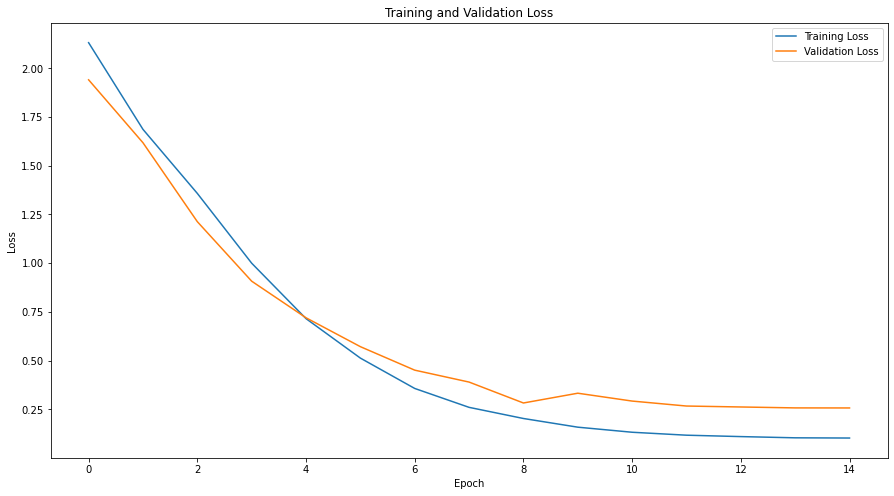

In [ ]:
# Plot the losses

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,8))
plt.title("Training and Validation Loss")
plt.plot(train_losses,label="Training Loss")
plt.plot(valid_losses,label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# Get the predictions and true values (labels)

from sklearn import metrics

model = model.eval()

predictions = []
labels = []

with torch.no_grad():
  for data in tqdm(test_loader, total=len(test_loader)):
    input_ids = data["input_ids"].to(DEVICE)
    attention_mask = data["attention_mask"].to(DEVICE)
    label = data["label"].to(DEVICE)
    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    _, predicted = torch.max(outputs, dim=1)

    predictions.extend(predicted)
    labels.extend(label)

predictions = torch.stack(predictions).cpu()
labels = torch.stack(labels).cpu()

100%|██████████| 2/2 [00:02<00:00,  1.30s/it]


In [ ]:
# Display the accuracy score
print(f"Accuracy Score = ", metrics.accuracy_score(predictions, labels))

In [ ]:
# Display the classification report
print(metrics.classification_report(labels, predictions, target_names=unique_intents))

                precision    recall  f1-score   support

         about       1.00      1.00      1.00         3
     complaint       1.00      0.67      0.80         3
    enrollment       1.00      1.00      1.00         4
       goodbye       1.00      0.67      0.80         3
      greeting       0.67      1.00      0.80         4
          help       0.89      1.00      0.94         8
          name       1.00      1.00      1.00         3
request ticket       1.00      1.00      1.00         7
        thanks       1.00      0.88      0.93         8

      accuracy                           0.93        43
     macro avg       0.95      0.91      0.92        43
  weighted avg       0.95      0.93      0.93        43



In [ ]:
!pip install transformers --quiet

In [ ]:

from transformers import BertTokenizer, BertModel
import torch
import json
import random
import os
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BERT_MODEL_NAME = "bert-base-uncased"
TOKENIZER = BertTokenizer.from_pretrained(BERT_MODEL_NAME)

data = torch.load("/content/drive/MyDrive/Tina Version 2/Datasets/Filtered Data Set/Intent/data.pth", map_location=DEVICE)

model_state = data["model_state"]
N_LABELS = data["n_labels"]
MAX_LEN = data["max_len"]
patterns = data["patterns"]
tags = data["tags"]

with open("/content/drive/MyDrive/Tina Version 2/Datasets/Filtered Data Set/Intent/intent.json") as file:
  d = json.load(file)

model = IntentModel(BERT_MODEL_NAME, N_LABELS)
model.load_state_dict(model_state)
model = model.to(DEVICE)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
bot_name = "TINA"
threshold = 0.70

os.system("cls")
print(f"Start chatting with {bot_name}! (type 'quit' to exit)")

while True:
  sentence = input("\nYou: ")
  if sentence == "quit":
      print("\nConversation ended. Thank you!")
      break

  tokenized_text = TOKENIZER.encode_plus(
    str(sentence),
    max_length=MAX_LEN,
    truncation=True,
    padding="max_length",
    add_special_tokens=True,
    return_tensors="pt"
  )

  input_ids = tokenized_text.input_ids.to(DEVICE)
  attention_mask = tokenized_text.attention_mask.to(DEVICE)

  output = model(input_ids, attention_mask)
  
  _, predicted = torch.max(output, dim=1)
  tag = tags[predicted.item()]
  probs = torch.softmax(output, dim=1)
  prob = probs[0][predicted.item()]
  if prob.item() > threshold:
    for intent in d['intents']:
      if tag == intent["tag"]:
        print(f"\n{bot_name}: {random.choice(intent['responses'])}")
  else:
    print(f"\n{bot_name}: Sorry, I don't quite understand. Please try again or ask a different question.")

Start chatting with TINA! (type 'quit' to exit)

You: Hi tina

TINA: Hi

You: I want to enroll

TINA: For New College Students the requriements would be  1) Report Card/Form 138 2) Certificate of Good Moral 3) PSA Certificate of Live Birth

You: What is your name?

TINA: I'm Tina !

You: I have a problem

TINA: Please mention your complaint, we will reach you and sorry for any inconvenience caused

You: What is the tuition fee for achitecture? 

TINA: Sorry, I don't quite understand. Please try again or ask a different question.

You: quit

Conversation ended. Thank you!
